### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')

In [58]:
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')

    if target_names is not None:
        plt.xticks(np.arange(len(target_names)), target_names)
        plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()

In [59]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target
print(np.bincount(y))

[178 182 177 183 181 182 181 179 174 180]


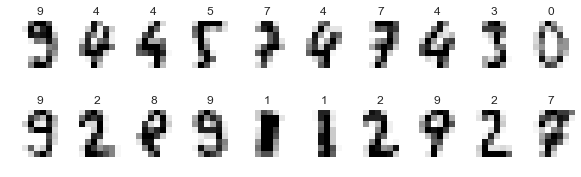

In [60]:
fig, axes = plt.subplots(2, 10, figsize=(10, 3))
for ax in axes.ravel():
    i = np.random.randint(0, digits.data.shape[0], 1)[0]
    ax.imshow(X[i].reshape(8, 8))
    ax.axis('off')
    ax.set_title(y[i])

In [61]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 4)

# 建立模型
clf = GradientBoostingClassifier(
loss="deviance", 
learning_rate = 0.1, # 每棵樹對最終結果的影響，應與 n_estimators 成反比
n_estimators = 100)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [62]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9666666666666667


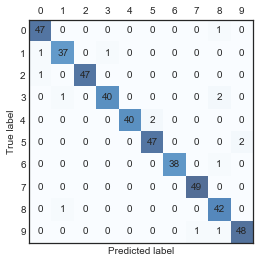

In [64]:
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, digits.target_names)